<a href="https://colab.research.google.com/github/mcnica89/Markov-Chains-RL-W25/blob/main/JAX_Simple_Gradient_Descent_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import packages.
import itertools
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt
from jax import nn as jnn
import random
import time
import math
import numpy as np
from tqdm import tqdm

# Jax Numpy is like numpy except for one thing


In [ ]:
numpy_array = np.array([1,2,3])
jax_array = jnp.array([1,2,3])
print(numpy_array)
print(jax_array)

[1 2 3]
[1 2 3]


In [ ]:
numpy_array[2] = 7
print(numpy_array)

[1 2 7]


In [ ]:
#jax_array[2] = 7 #Will not run because jax arrays are immutable!!!
jax_array = jax_array.at[2].set(7)
print(jax_array)

[1 2 7]


# Super simple 1 parameter example.

Function class are lines that go through 0.
$f(x;\theta) = \theta x$

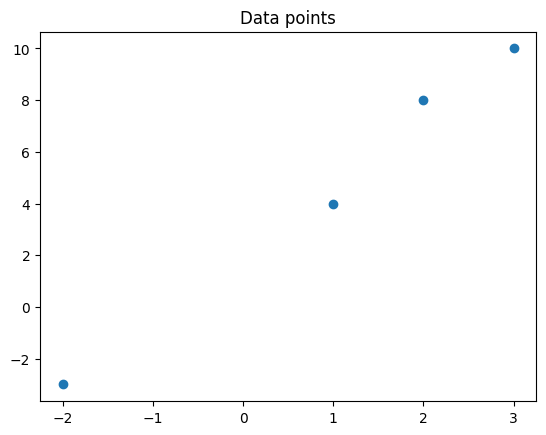

In [ ]:
X = jnp.array([-2,1,2,3],dtype=float)
Y = jnp.array([-3,4,8,10],dtype=float)
assert jnp.shape(X) == jnp.shape(Y)
plt.title("Data points")
plt.plot(X,Y,linestyle="",marker="o")

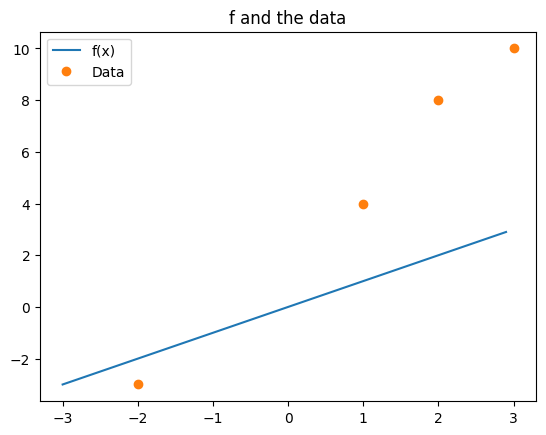

In [ ]:
def f(x,theta):
  return theta*x
theta = 1.0
x_values = jnp.arange(-3,3,0.1)
fx_values = f(x_values,theta)
plt.title("f and the data")
plt.plot(x_values,fx_values,label="f(x)")
plt.plot(X,Y,linestyle="",marker="o",label="Data")
plt.legend()


# Intro to Jax.grad


In [ ]:
def square(x):
  return x*x

#jax.grad does the derivative w.r.t. the 0th input by default
grad_square = jax.grad(square)
grad_square(4.0)

Array(8., dtype=float32, weak_type=True)

In [ ]:
def quadratic_form(x_vec):
  return 5.0*x_vec[0]*x_vec[0] + 7.0*x_vec[1]*x_vec[1] + 100.0*x_vec[0]*x_vec[1]

#jax.grad does the derivative w.r.t. the 0th input by default
grad_quad = jax.grad(quadratic_form)
grad_quad(jnp.array([1.0,2.0]))

Array([210., 128.], dtype=float32)

# Loss Function for Fitting Data

In [ ]:
def loss(theta):
  return jnp.mean(jnp.square(f(X,theta) - Y))

#jax.grad does the derivative w.r.t. the 0th input by default
grad_loss = jax.grad(loss)

In [ ]:
grad_loss(1.0) #this evaluates the derivative at theta!

Array(-19., dtype=float32, weak_type=True)

# Fitting with Gradient Descent

In [ ]:
#def f(x,theta):
#  return theta*x

#def f(x,theta):
#  return theta[0] + theta[1]*x + theta[2]*x**2

def relu(x):
  return jnp.minimum(1.0,jnp.maximum(0.0,x))


def f(x,theta):
  size = 8 #theta has to be this size +1 for the overall global shift
  my_grid = jnp.linspace(-5,5,size)
  return theta[-1] + jnp.sum( theta[None,:-1]*relu(x[:,None]-my_grid[None,:]), axis=1)


In [ ]:
def loss(theta):
  return jnp.mean(jnp.square(f(X,theta) - Y))

grad_loss = jax.grad(loss)

100%|██████████| 100/100 [00:01<00:00, 61.16it/s]


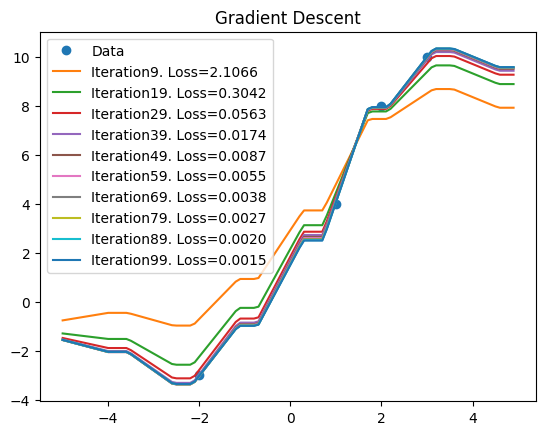

In [ ]:
key = jax.random.PRNGKey(3)
key,subkey = jax.random.split(key)
theta = jax.random.normal(key,9) #0.0 #initial parameter (make sure its a float!)
alpha = 0.15 #learing rate
num_iterations = 100
x_values = jnp.arange(-5,5,0.1)
plt.title("Gradient Descent")
plt.plot(X,Y,linestyle="",marker="o",label="Data")
for i in tqdm(range(num_iterations)):
  theta -= alpha*grad_loss(theta) #Gradient descent!
  fx_values = f(x_values,theta)
  if (i+1) % 10 == 0:
    plt.plot(x_values,fx_values,label=f"Iteration{i}. Loss={loss(theta):.4f}")

plt.legend()


##